In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report
import seaborn
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from matplotlib.colors import ListedColormap

In [2]:
dataSet = pd.read_csv('preprocessedData.csv')

/home/otily/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (1,2) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
dataSet

,No,src_ip,dst_ip,src_port,dst_port,protocol,pkt_length,info,timestamp,flow_duration,...,idle_min,idle_mean,idle_std,fwd_byts_b_avg,fwd_pkts_b_avg,bwd_byts_b_avg,bwd_pkts_b_avg,fwd_blk_rate_avg,bwd_blk_rate_avg,Target
0,1,3232248433,4294967295,49154,6667,17,230,0,1.626826e+09,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,6,3232248429,4294967295,49154,6666,17,218,0,1.626826e+09,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,7,3232248456,312941680,48974,10001,17,60,0,1.626826e+09,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,8,3232248456,312877302,48974,10001,17,60,0,1.626826e+09,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,9,3232248456,598895559,48974,10001,17,60,0,1.626826e+09,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554381,39977,3232248456,598895559,48974,10001,17,60,0,1.626890e+09,15050646.0,...,78268.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
554382,39978,3232248491,4294967295,49154,6666,17,218,0,1.626890e+09,14997531.0,...,2997846.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
554383,39979,222019745,3232248492,443,60788,6,145,1952564533,1.626890e+09,15022225.0,...,18693.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
554384,39980,222019745,3232248492,443,60788,6,113,2376987557,1.626890e+09,15040760.0,...,18535.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [4]:
dataSet.head(20)

,No,src_ip,dst_ip,src_port,dst_port,protocol,pkt_length,info,timestamp,flow_duration,...,idle_min,idle_mean,idle_std,fwd_byts_b_avg,fwd_pkts_b_avg,bwd_byts_b_avg,bwd_pkts_b_avg,fwd_blk_rate_avg,bwd_blk_rate_avg,Target
0,1,3232248433,4294967295,49154,6667,17,230,0,1.626826e+09,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
1,6,3232248429,4294967295,49154,6666,17,218,0,1.626826e+09,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
2,7,3232248456,312941680,48974,10001,17,60,0,1.626826e+09,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
3,8,3232248456,312877302,48974,10001,17,60,0,1.626826e+09,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
4,9,3232248456,598895559,48974,10001,17,60,0,1.626826e+09,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
5,10,3232248491,4294967295,49154,6666,17,218,0,1.626826e+09,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
6,11,3232248545,4294967295,62500,6667,17,214,0,1.626826e+09,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
7,14,3232248468,3758096635,5353,5353,17,81,0,1.626826e+09,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
8,15,3232248468,3758096635,5353,5353,17,91,0,1.626826e+09,240.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
9,16,3232248468,3758096635,5353,5353,17,220,0,1.626826e+09,493.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0


In [5]:
dataSet.tail(20)

,No,src_ip,dst_ip,src_port,dst_port,protocol,pkt_length,info,timestamp,flow_duration,...,idle_min,idle_mean,idle_std,fwd_byts_b_avg,fwd_pkts_b_avg,bwd_byts_b_avg,bwd_pkts_b_avg,fwd_blk_rate_avg,bwd_blk_rate_avg,Target
554366,39960,3232248456,312877302,48974,10001,17,330,0,1.626890e+09,12652899.0,...,2609726.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
554367,39961,3232248456,598895559,48974,10001,17,330,0,1.626890e+09,12652908.0,...,2609726.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
554368,39962,3232248456,598895559,48974,10001,17,330,0,1.626890e+09,12731176.0,...,78268.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
554369,39963,3232248504,4294967295,49154,6667,17,230,0,1.626890e+09,9998201.0,...,4995498.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
554370,39964,3232248456,312941680,48974,10001,17,330,0,1.626890e+09,12902647.0,...,249757.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
554371,39965,3232248456,312877302,48974,10001,17,330,0,1.626890e+09,12906964.0,...,254065.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
554372,39966,3232248438,4294967295,49154,6667,17,230,0,1.626890e+09,10003932.0,...,5000764.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
554373,39967,222019745,3232248492,443,60788,6,519,1952564486,1.626890e+09,11380779.0,...,11380669.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
554374,39968,222019745,3232248492,443,60788,6,113,2376987478,1.626890e+09,11399472.0,...,18693.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
554375,39969,222019745,3232248492,443,60788,6,66,1952564533,1.626890e+09,11399605.0,...,18693.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [6]:
dataSet.tail(50)

,No,src_ip,dst_ip,src_port,dst_port,protocol,pkt_length,info,timestamp,flow_duration,...,idle_min,idle_mean,idle_std,fwd_byts_b_avg,fwd_pkts_b_avg,bwd_byts_b_avg,bwd_pkts_b_avg,fwd_blk_rate_avg,bwd_blk_rate_avg,Target
554336,39927,3232248522,3232248462,1900,54784,17,335,0,1.626890e+09,1776720.0,...,49570.0,0.0,0.0,2075.0,7.0,0.0,0.0,1167.882390,0.0,0
554337,39928,3232248522,3232248462,1900,54784,17,344,0,1.626890e+09,1826591.0,...,49570.0,0.0,0.0,2377.0,8.0,0.0,0.0,1301.331278,0.0,0
554338,39929,3232248522,3232248462,1900,54784,17,338,0,1.626890e+09,1877198.0,...,49570.0,0.0,0.0,2673.0,9.0,0.0,0.0,1423.930773,0.0,0
554339,39930,3232248504,4294967295,49154,6667,17,230,0,1.626890e+09,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
554340,39931,3232248462,4294967295,9999,9999,17,71,0,1.626890e+09,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
554341,39932,3232248438,4294967295,49154,6667,17,230,0,1.626890e+09,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0
554342,39933,3232248522,3232248462,1900,54784,17,335,0,1.626890e+09,2781497.0,...,49570.0,0.0,0.0,2966.0,10.0,0.0,0.0,1066.332266,0.0,0
554343,39934,3232248522,3232248462,1900,54784,17,344,0,1.626890e+09,2832084.0,...,49570.0,0.0,0.0,3268.0,11.0,0.0,0.0,1153.920576,0.0,0
554344,39935,3232248522,3232248462,1900,54784,17,338,0,1.626890e+09,2881495.0,...,49411.0,0.0,0.0,3564.0,12.0,0.0,0.0,1236.857950,0.0,0
554345,39936,3232248433,4294967295,49154,6667,17,230,0,1.626890e+09,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0


In [7]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 554386 entries, 0 to 554385
Data columns (total 79 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   No                 554386 non-null  int64  
 1   src_ip             554386 non-null  object 
 2   dst_ip             554386 non-null  object 
 3   src_port           554386 non-null  int64  
 4   dst_port           554386 non-null  int64  
 5   protocol           554386 non-null  int64  
 6   pkt_length         554386 non-null  int64  
 7   info               554386 non-null  int64  
 8   timestamp          554386 non-null  float64
 9   flow_duration      554386 non-null  float64
 10  flow_byts_s        554386 non-null  float64
 11  flow_pkts_s        554386 non-null  float64
 12  fwd_pkts_s         554386 non-null  float64
 13  bwd_pkts_s         554386 non-null  float64
 14  tot_fwd_pkts       554386 non-null  int64  
 15  tot_bwd_pkts       554386 non-null  int64  
 16  to

In [8]:
dataSet.describe()

,No,src_port,dst_port,protocol,pkt_length,info,timestamp,flow_duration,flow_byts_s,flow_pkts_s,...,idle_min,idle_mean,idle_std,fwd_byts_b_avg,fwd_pkts_b_avg,bwd_byts_b_avg,bwd_pkts_b_avg,fwd_blk_rate_avg,bwd_blk_rate_avg,Target
count,554386.000000,554386.000000,554386.000000,554386.000000,554386.000000,5.543860e+05,5.543860e+05,5.543860e+05,5.543860e+05,554386.000000,...,5.543860e+05,554386.0,554386.0,554386.000000,554386.000000,554386.000000,554386.000000,5.543860e+05,5.543860e+05,554386.000000
mean,42495.767260,40794.121347,11325.243756,15.148822,211.563685,3.579725e+08,1.627849e+09,1.017314e+09,9.710456e+04,729.273573,...,2.110759e+06,0.0,0.0,285.980580,1.027140,29.123256,0.045046,1.294389e+04,1.134932e+05,0.299975
std,50076.359508,19394.671012,15818.340434,4.115353,159.720422,9.346038e+08,1.645166e+06,2.000340e+09,4.216764e+06,13151.761884,...,2.444282e+06,0.0,0.0,848.718736,2.830515,740.543283,0.687684,1.418456e+05,1.651431e+06,0.458247
min,1.000000,53.000000,53.000000,6.000000,54.000000,0.000000e+00,1.626815e+09,0.000000e+00,0.000000e+00,0.000000,...,0.000000e+00,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,12421.000000,40614.000000,5353.000000,17.000000,97.000000,0.000000e+00,1.626844e+09,1.557005e+05,4.216788e+01,0.200254,...,1.775300e+04,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
50%,25602.500000,49154.000000,6667.000000,17.000000,218.000000,0.000000e+00,1.626874e+09,2.303079e+07,5.700085e+01,0.305401,...,2.854220e+05,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
75%,39442.750000,49154.000000,10000.000000,17.000000,230.000000,0.000000e+00,1.630344e+09,6.900286e+08,2.474298e+02,0.781877,...,4.935284e+06,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,1.000000
max,246766.000000,65482.000000,65280.000000,17.000000,1514.000000,4.294967e+09,1.631136e+09,8.526020e+09,8.235000e+08,1000000.000000,...,3.963460e+07,0.0,0.0,14306.000000,26.000000,59373.000000,47.000000,1.301167e+07,5.680303e+07,1.000000


In [9]:
rr = dataSet["Target"]
print (rr)

0         0
1         0
2         0
3         0
4         0
         ..
554381    0
554382    0
554383    0
554384    0
554385    0
Name: Target, Length: 554386, dtype: int64


In [10]:
rrr = dataSet[dataSet["Target"] > 0]
print(rrr)


            No      src_ip      dst_ip  src_port  dst_port  protocol  \
31852        1  3232248438  4294967295     49154      6667        17   
31853        8  3232248559  3232248575     58135     10000        17   
31854        9  3232248433  4294967295     49154      6667        17   
31855       25  3232248491  4294967295     49154      6666        17   
31856       34  3232248559  3232248575     58136     10000        17   
...        ...         ...         ...       ...       ...       ...   
456158  213527  3232248438  4294967295     49154      6667        17   
456159  213530  3232248491  4294967295     49154      6666        17   
456160  213531  3232248545  4294967295     58230      6667        17   
456161  213532  3232248433  4294967295     49154      6667        17   
456162  213548  3232248491  4294967295     49154      6666        17   

        pkt_length  info     timestamp  flow_duration  ...   idle_min  \
31852          230     0  1.626983e+09   0.000000e+00  ...    

In [11]:
dataSet.columns

Index(['No', 'src_ip', 'dst_ip', 'src_port', 'dst_port', 'protocol',
       'pkt_length', 'info', 'timestamp', 'flow_duration', 'flow_byts_s',
       'flow_pkts_s', 'fwd_pkts_s', 'bwd_pkts_s', 'tot_fwd_pkts',
       'tot_bwd_pkts', 'totlen_fwd_pkts', 'totlen_bwd_pkts', 'fwd_pkt_len_max',
       'fwd_pkt_len_min', 'fwd_pkt_len_mean', 'fwd_pkt_len_std',
       'bwd_pkt_len_max', 'bwd_pkt_len_min', 'bwd_pkt_len_mean',
       'bwd_pkt_len_std', 'pkt_len_max', 'pkt_len_min', 'pkt_len_mean',
       'pkt_len_std', 'pkt_len_var', 'fwd_header_len', 'bwd_header_len',
       'fwd_seg_size_min', 'fwd_act_data_pkts', 'flow_iat_mean',
       'flow_iat_max', 'flow_iat_min', 'flow_iat_std', 'fwd_iat_tot',
       'fwd_iat_max', 'fwd_iat_min', 'fwd_iat_mean', 'fwd_iat_std',
       'bwd_iat_tot', 'bwd_iat_max', 'bwd_iat_min', 'bwd_iat_mean',
       'bwd_iat_std', 'fwd_psh_flags', 'bwd_psh_flags', 'fwd_urg_flags',
       'bwd_urg_flags', 'fin_flag_cnt', 'syn_flag_cnt', 'rst_flag_cnt',
       'psh_flag_cnt

In [12]:
X = dataSet[['No', 'src_ip', 'dst_ip', 'src_port', 'dst_port', 'protocol',
       'pkt_length', 'info', 'timestamp', 'flow_duration', 'flow_byts_s',
       'flow_pkts_s', 'fwd_pkts_s', 'bwd_pkts_s', 'tot_fwd_pkts',
       'tot_bwd_pkts', 'totlen_fwd_pkts', 'totlen_bwd_pkts', 'fwd_pkt_len_max',
       'fwd_pkt_len_min', 'fwd_pkt_len_mean', 'fwd_pkt_len_std',
       'bwd_pkt_len_max', 'bwd_pkt_len_min', 'bwd_pkt_len_mean',
       'bwd_pkt_len_std', 'pkt_len_max', 'pkt_len_min', 'pkt_len_mean',
       'pkt_len_std', 'pkt_len_var', 'fwd_header_len', 'bwd_header_len',
       'fwd_seg_size_min', 'fwd_act_data_pkts', 'flow_iat_mean',
       'flow_iat_max', 'flow_iat_min', 'flow_iat_std', 'fwd_iat_tot',
       'fwd_iat_max', 'fwd_iat_min', 'fwd_iat_mean', 'fwd_iat_std',
       'bwd_iat_tot', 'bwd_iat_max', 'bwd_iat_min', 'bwd_iat_mean',
       'bwd_iat_std', 'fwd_psh_flags', 'bwd_psh_flags', 'fwd_urg_flags',
       'bwd_urg_flags', 'fin_flag_cnt', 'syn_flag_cnt', 'rst_flag_cnt',
       'psh_flag_cnt', 'ack_flag_cnt', 'urg_flag_cnt', 'ece_flag_cnt',
       'down_up_ratio', 'pkt_size_avg', 'init_fwd_win_byts',
       'init_bwd_win_byts', 'active_max', 'active_min', 'active_mean',
       'active_std', 'idle_max', 'idle_min', 'idle_mean', 'idle_std',
       'fwd_byts_b_avg', 'fwd_pkts_b_avg', 'bwd_byts_b_avg', 'bwd_pkts_b_avg',
       'fwd_blk_rate_avg', 'bwd_blk_rate_avg']].values
y = dataSet['Target'].values

In [ ]:
from imblearn.ensemble import BalanceBaggingClassifier


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = 0)

In [14]:
X_test.shape

(166316, 78)

In [15]:
classifier = LogisticRegression(random_state = 0,C = 1e5)

In [16]:
classifier.fit(X_train, y_train)

/home/otily/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=100000.0, random_state=10)

In [17]:
y_pred = classifier.predict(X_test)

In [18]:
classifier.score(X_test, y_test)


0.7007203155439043

In [19]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [20]:
cm

array([[116541,      0],
       [ 49775,      0]])

In [1]:
def iot_otily_funct(cf, group_names=None,categories='auto',count=True,
                          percent=True,cbar=True, xyticks=True,xyplotlabels=True,
                          sum_stats=True,figsize=None,cmap='Blues',title='Confusion matrix'):
   
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    
    if sum_stats:
       
        accuracy  = np.trace(cf) / float(np.sum(cf))

        
        if len(cf)==2:
            
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    if figsize==None:
        
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
      
        categories=False

    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('Actual label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

<ipython-input-21-c91d9c2493f1>:34: RuntimeWarning: invalid value encountered in long_scalars
  precision = cf[1,1] / sum(cf[:,1])


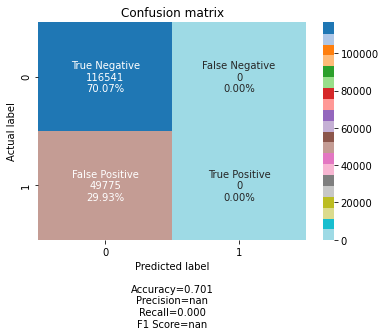

In [22]:
labels = ['True Negative','False Negative','False Positive','True Positive']
categories = ['0', '1']
iot_otily_funct(cm, group_names=labels, categories=categories, cmap='tab20_r')

In [23]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      1.00      0.82    116541
           1       0.00      0.00      0.00     49775

    accuracy                           0.70    166316
   macro avg       0.35      0.50      0.41    166316
weighted avg       0.49      0.70      0.58    166316



/home/otily/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/otily/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/otily/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
